In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
data=pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
data.head()


,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [7]:
data['TxnDate'] = pd.to_datetime(data['TxnDate'])
data = data.sort_values('TxnDate')
data['TxnDate'] = data['TxnDate'].apply(lambda x: x.toordinal())
X = data['TxnDate'].values.reshape(-1, 1)
y = data['Consumption'].values

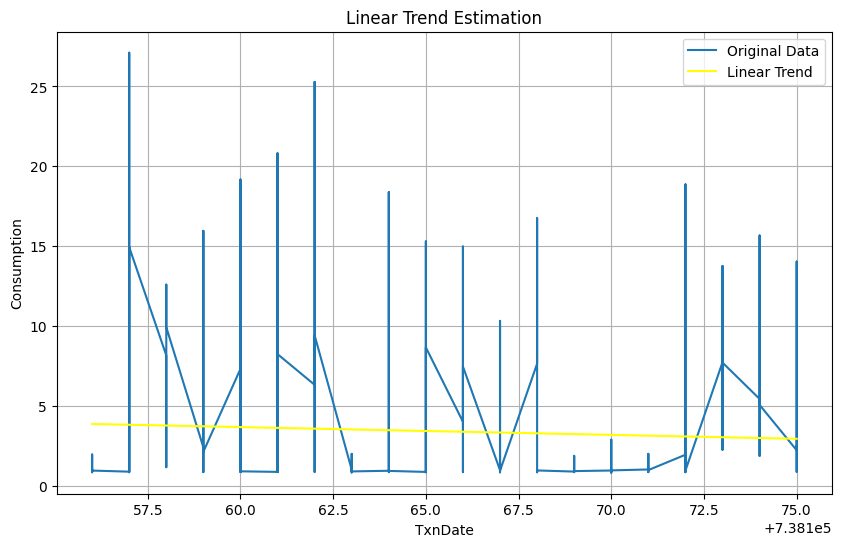

In [8]:
linear_model = LinearRegression()
linear_model.fit(X, y)
data['Linear_Trend'] = linear_model.predict(X)
plt.figure(figsize=(10,6))
plt.plot(data['TxnDate'], data['Consumption'],label='Original Data')
plt.plot(data['TxnDate'], data['Linear_Trend'], color='yellow', label='Linear Trend')
plt.title('Linear Trend Estimation')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

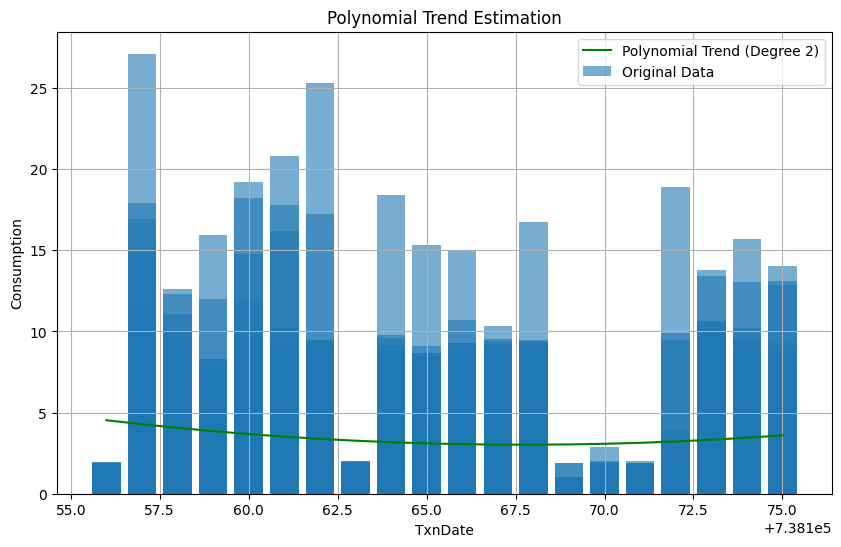

In [9]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
data['Polynomial_Trend'] = poly_model.predict(X_poly)
plt.figure(figsize=(10,6))
plt.bar(data['TxnDate'], data['Consumption'], label='Original Data', alpha=0.6)
plt.plot(data['TxnDate'], data['Polynomial_Trend'],color='green', label='Polynomial Trend (Degree 2)')
plt.title('Polynomial Trend Estimation')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()